In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
# from mpl_toolkits import mplot3d
# import Axes3D
from Library.Weyl_Nodal_line import*
from Library.kpmpy import*
from Library.others import*
import Library.tbmodels as tb
from tqdm import trange
import kwant
import csv
import tqdm

# $\textcolor{red}{Model ~Hamiltonian}$ 

# <h2> The Hamiltonain in the momentum space of the model is given by: $\begin{equation}  h_k = (t_x\cos(k_x) + t_y\cos(k_y) + \cos(k_z) -m)\tau_1 + t_2\sin(k_z)\tau_2 \end{equation}$ Where $\tau's$ are the pauli matrices. 

In [3]:
# call the class to generate the Hamiltonian
W = HamWeyl(1.1,0.9,2.12,0)
# H = W.hamiltonian(0,0,0)

# $\textcolor{yellow}{Band ~Structure}$ 

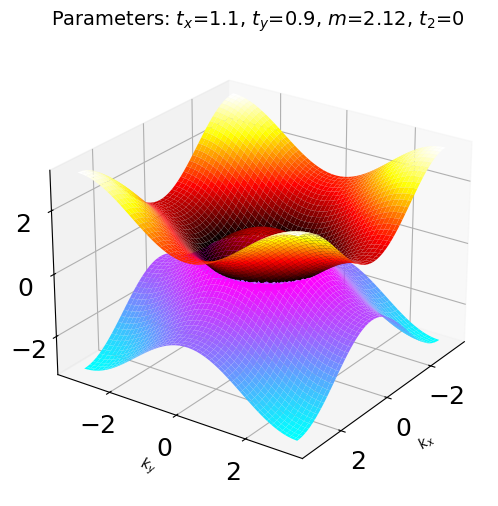

In [4]:
# plot the band structure for fixed kz in 3D
p = W.plot_eigenvalues(0)

# <h3> For the given set of parameters, it is possible to obtain a single nodal line which can be seen in the heatmap plot of the band structure plot

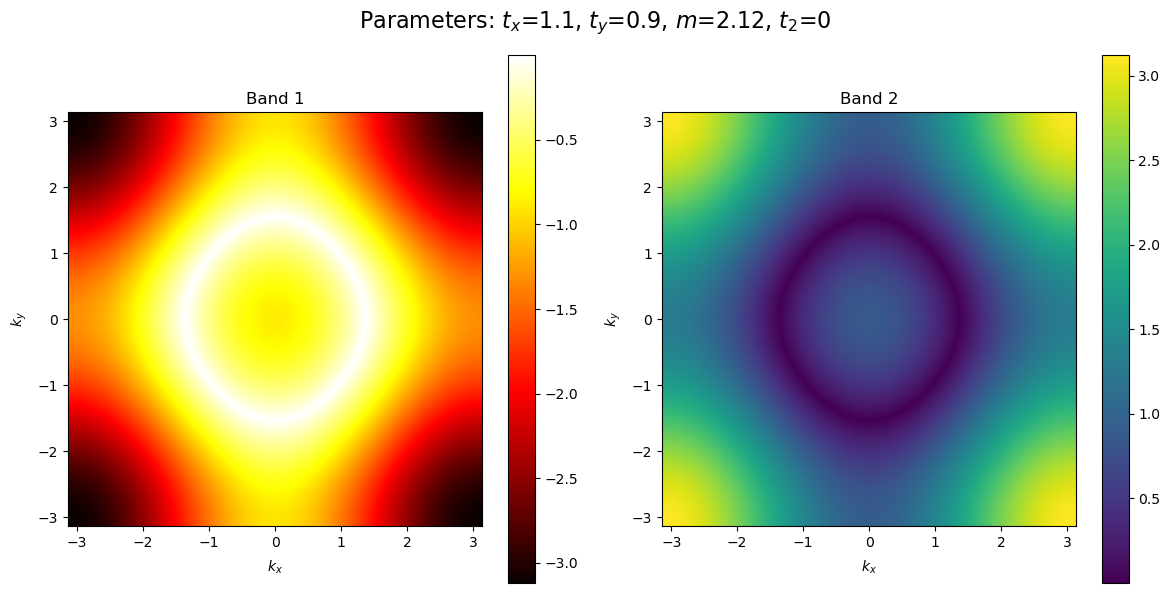

In [5]:
#heat map of the band structure
K = W.plot_eigen(0)

# <h3> See the Top view of the higher energy band (band 2). As can be seen, there is a loop of zero energy states where the two bands touch. For the set of parameters, we are interested in For the set of parameters we are interested in, $k_z$ = 0 and $(t_x\cos(k_x) + t_y\cos(k_y) + \cos(k_z) -m)$ = 0.

# $\textcolor{green}{Real ~space ~picture}$

# <h3> By doing inverse fourier transform in all direction, we can obtain the real space picture of the nodal line. $ \\H = \frac{t_x}{2}\sum_{i}(a_i^{\dagger}b_{i+e_x} +a_i^{\dagger}b_{i-e_x}) + \frac{t_y}{2}\sum_{i}(a_i^{\dagger}b_{i+e_y} +a_i^{\dagger}b_{i-e_y}) + \frac{1}{2}\sum_{i}((1-t_2)a_i^{\dagger}b_{i+e_z} + (1+t_2)a_i^{\dagger}b_{i-e_z}) - ma_i^{\dagger}b_{i} + h.c. $

Making Hamiltonian: 100%|██████████| 10/10 [00:00<00:00, 296.56it/s]


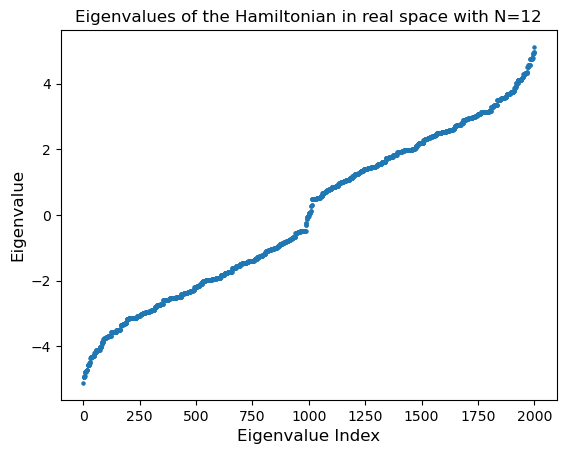

In [6]:
#Real Space Hamiltonian
w = 0
N = 12
a = Lattice_S(10,1.1,0.9,2.12,0.8,w)
# find the eigenvalues of the hamiltonian
eigvals, eigvecs = np.linalg.eig(a.hamiltonian.toarray())
y = np.sort(np.real(eigvals))
#plot the eigenvalues scatter plot
plt.scatter(np.arange(0,len(y)),y, s = 5)
#put the axis labels
plt.xlabel('Eigenvalue Index', fontsize=12)
plt.ylabel('Eigenvalue', fontsize=12)
plt.title(f'Eigenvalues of the Hamiltonian in real space with N={N}')
plt.tick_params(axis='both', which='major', labelsize=10)
# plt.grid(True)
plt.show()

# <h3> 

# Equivalence of the two pictures

# <h3> To establish the equivalence of the two pictures, we discretize the Hamiltonian in the momentum space. The real space Hamiltonian is then diagonalized to obtain the eigenvalues and the eigenvectors. The eigenvalues are then plotted in the momentum space to obtain the band structure. The band structure is then compared with the band structure obtained from the momentum space Hamiltonian.

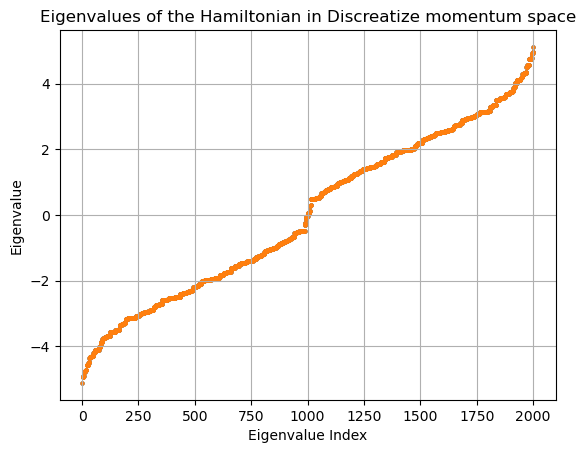

In [7]:
# # plot the eigenvalues
r = DiscretizeBZ(1.1, 0.9, 2.12, 0.8)
R = DiscretizeBZ(1.1, 0.9, 2.12, -0.8)
s = r.calculate_eigen(10)
S = R.calculate_eigen(10)
y = np.sort(s)
Y = np.sort(S)
x = np.linspace(1, len(y), len(y))
X = np.linspace(1, len(Y), len(Y))
plt.scatter(x, y, s=5)
plt.scatter(X, Y, s=5)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Hamiltonian in Discreatize momentum space')
plt.grid(True)
plt.show()

# Density of states 

In [8]:
# # 
# w = 3  #w non zero implies the presence of a disorder
# n = 160
# b = Lattice_S(n, 1.1, 0.9, 2.12, 0.8, w)
# k = b.hamiltonian

# num_moments_list = [1200]  # List of different num_moments values
# colors = ['r']  # List of colors for each num_moments value
# #write descriptions
# for num_moments, color in zip(num_moments_list, colors):
#     x = kwant.kpm.SpectralDensity(k, params=None, operator=None, num_vectors=1, num_moments=num_moments)
#     e, rho = x()
#     plt.plot(e, rho, color=color, label=f'num_moments = {num_moments}')
# # #format n_W_mu
# # # Save data to a CSV file
# # file_name = 'SD_160_1d5_1200.csv'
# # with open(file_name, mode='w', newline='') as file:
# #     writer = csv.writer(file)
# #     writer.writerow(['Energy', 'Density'])  # Write header
# #     for energy, density in zip(e, rho):
# #         writer.writerow([energy, density])

# # print(f"Data saved to '{file_name}'")


No disorder

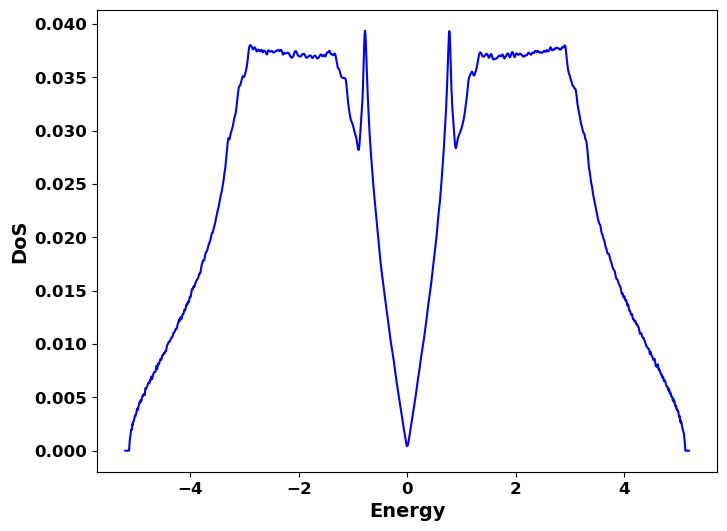

In [9]:
# Read data from CSV file
file_name = 'SD_160_0_1000.csv'
energies = []
densities = []
with open(file_name, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        energy, density = map(complex, row)
        energies.append(energy.real)  # Use real part of complex number
        densities.append(density.real/(8*160**3))  # Use real part of complex number

# Plot spectral density
plt.figure(figsize=(8, 6))
plt.plot(energies, densities, color='blue')
plt.xlabel('Energy', fontsize=14, fontweight='bold')
plt.ylabel('DoS', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
# # plt.title('Spectral Density Plot')
# plt.legend()
# plt.grid(True)
# plt.xlim(0, 0.1)
plt.show()



With disorder

In [10]:
# List of file names to read
# file_names = ['SD_160_0_1000.csv', 'SD_160_1d5_1000.csv', 'SD_160_1d5_1200.csv', 'SD_160_1d5_1400.csv', 'SD_160_1d5_1600.csv', 'SD_160_1d5_1800.csv',
#               'SD_160_1d5_2000.csv', 'SD_160_2d5_1000.csv', 'SD_160_2d5_1200.csv', 'SD_160_2d5_1400.csv', 'SD_160_2d5_1600.csv',
#               'SD_160_2d5_1800.csv', 'SD_160_2d5_2000.csv', 'SD_160_3d25_1000.csv', 'SD_160_3d25_1200.csv', 'SD_160_3d25_1400.csv'
#               ,'SD_160_3d25_1600.csv', 'SD_160_3d25_1800.csv', 'SD_160_3d25_2000.csv']
# W = [0, 1.5, 2.5, 3.25]
# N = [1000, 1200, 1400, 1600, 1800, 2000]
# # Initialize lists to store energies and densities from each file
# all_energies = []
# all_densities = []

# # Loop through each file name and read the data
# for file_name in file_names:
#     energies = []
#     densities = []
#     with open(file_name, mode='r') as file:
#         reader = csv.reader(file)
#         next(reader)  # Skip header
#         for row in reader:
#             energy, density = map(complex, row)
#             energies.append(energy.real)  # Use real part of complex number
#             densities.append(density.real / (8 * 160 ** 3))  # Use real part of complex number
#     all_energies.append(energies)
#     all_densities.append(densities)

# # Plot spectral densities for each file
# plt.figure(figsize=(8, 6))

# for energies, densities, W, N in zip(all_energies, all_densities,W, N):
#     plt.plot(energies, densities, label = N)

# plt.xlabel('Energy', fontsize=14, fontweight='bold')
# plt.ylabel('DoS', fontsize=14, fontweight='bold')
# plt.tick_params(axis='both', which='major', labelsize=10)
# plt.xticks(fontsize=12, fontweight='bold')
# plt.yticks(fontsize=12, fontweight='bold')
# plt.title('Spectral Density Comparison')
# plt.legend()
# plt.grid(True)
# plt.xlim(0, 0.1)
# plt.show()


Local density of states

Making Hamiltonian: 100%|██████████| 160/160 [01:53<00:00,  1.41it/s]


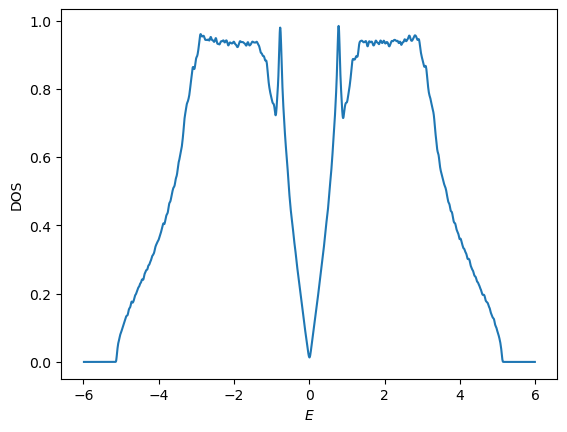

In [15]:
#calcuate the local density of states 
w = 0  #w non zero implies the presence of a disorder
n = 160
b = Lattice_S(n, 1.1, 0.9, 2.12, 0.8, w)
H = b.hamiltonian
# site_index = 10
kpm = KPM(H, N_random = 1, N_moments = 1000, N_division = 2000, kernel='Jackson', H_scale=6.)
energy = np.linspace(-kpm.H_scale*0.95,kpm.H_scale*0.95,kpm.N_division)
plt.plot(energy, kpm.get_DOS(energy))
plt.xlabel(r'$E$')
plt.ylabel('DOS')
plt.show()

Making Hamiltonian: 100%|██████████| 160/160 [01:49<00:00,  1.46it/s]


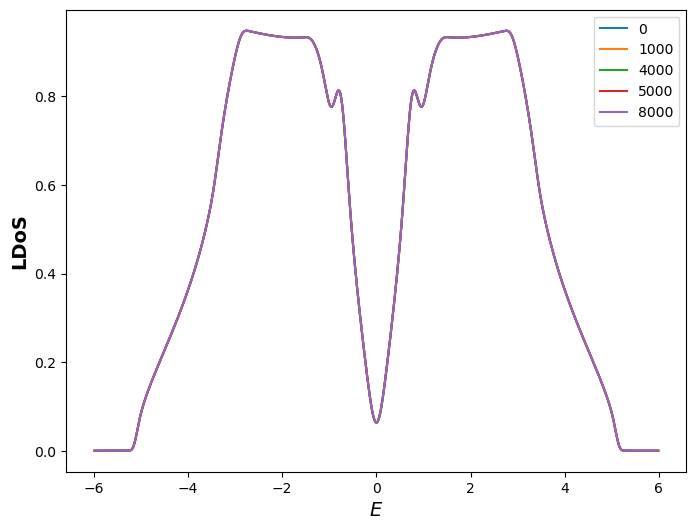

In [ ]:
# Define your lattice parameters and Hamiltonian
w = 0  # w non-zero implies the presence of disorder
n = 160
b = Lattice_S(n, 1.1, 0.9, 2.12, 0.8, w)
H = b.hamiltonian

# Define KPM parameters
N_random = 1
N_moments = 1000
N_division = 2000
kernel = 'Jackson'
H_scale = 6.

# Create KPM object
kpm = KPM(H, N_random=N_random, N_moments=N_moments, N_division=N_division, kernel=kernel, H_scale=H_scale)

# Define energy range
energy = np.linspace(-kpm.H_scale * 0.95, kpm.H_scale * 0.95, kpm.N_division)

# Plot LDOS for different site indices
site_indices = [0, 1000, 4000, 5000, 8000]  # Define the site indices you want to investigate

plt.figure(figsize=(8, 6))
for site_index in site_indices:
    ldos = kpm.get_LDOS(energy, site_index)
    plt.plot(energy, ldos, label=f'{site_index}')

plt.xlabel(r'$E$', fontsize = 14, fontweight = 'bold')
plt.ylabel('LDoS', fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()


Making Hamiltonian: 100%|██████████| 160/160 [01:49<00:00,  1.46it/s]


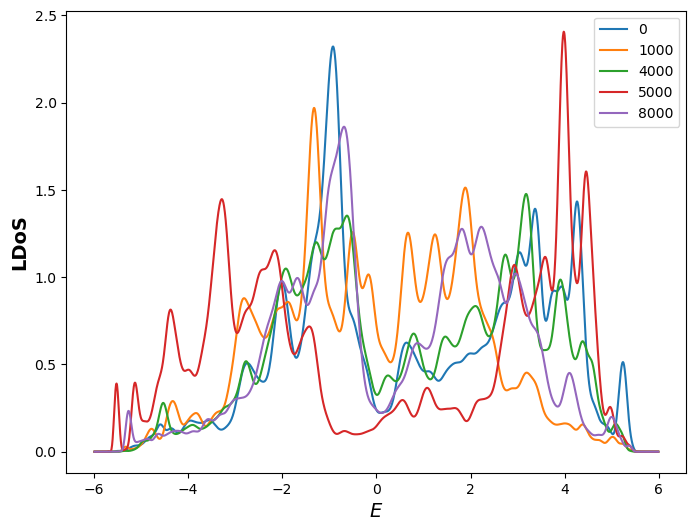

In [ ]:
# Define your lattice parameters and Hamiltonian
w = 3  # w non-zero implies the presence of disorder
n = 160
b = Lattice_S(n, 1.1, 0.9, 2.12, 0.8, w)
H = b.hamiltonian

# Define KPM parameters
N_random = 20
N_moments = 200
N_division = 2000
kernel = 'Jackson'
H_scale = 6.

# Create KPM object
kpm = KPM(H, N_random=N_random, N_moments=N_moments, N_division=N_division, kernel=kernel, H_scale=H_scale)

# Define energy range
energy = np.linspace(-kpm.H_scale * 0.95, kpm.H_scale * 0.95, kpm.N_division)

# Plot LDOS for different site indices
site_indices = [0, 1000, 4000, 5000, 8000]  # Define the site indices you want to investigate

plt.figure(figsize=(8, 6))
for site_index in site_indices:
    ldos = kpm.get_LDOS(energy, site_index)
    plt.plot(energy, ldos, label=f'{site_index}')

plt.xlabel(r'$E$', fontsize = 14, fontweight = 'bold')
plt.ylabel('LDoS', fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()